In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [2]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('크리스마스')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('ul') 

In [3]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['   @txt@   @date@. 삭제   ',
 '   @txt@   추가     @txt@   @date@. 추가   ',
 ' 통합이미지어학사전VIEW지식iN인플루언서동영상쇼핑뉴스지도 ',
 ' 책뮤직지식백과오디오클립학술정보 ',
 '  공유  ',
 '   기간  전체1시간1일1주1개월3개월6개월1년 직접입력옵션펼치기접기     기간 설정시작       기간 설정끝      년(Year)           월(Month)           일(Day)            적용       답변  전체eXpert전문가변호사변리사법무사노무사회계사세무사의사한의사수의사약사영양사운동전문가손해사정사경영지도사기술지도사기술사관세사지식파트너분야별 지식인지존이상       옵션 초기화 검색옵션 가이드    ',
 ' ',
 ' ',
 ' ',
 '    Q  문서 저장하기  Keep에 저장 Keep 바로가기    크리스마스에 친구 생일인데 ... 친구들이 크리스마스에 파티를 하자고 얘기가 오가는 상황인데 생일인 친구랑 다른 무리 친구들이랑 크리스마스 파티를 하면 안 되는 건가요?... 생일인 친구가 서운할 수 있다는 건 이해하지만 그 친구 생일이라고 해서 제가크리스마스에 다른 친구들이랑 놀지 않아야 한다는 건 조금 이해할 수...      1:1  A     우주신아동, 미성년 상담  여성가족부.한국청소년상담복...      ... 반가워요~~*^^* 친구의 생일 축하와 크리스마스 파티를... 친구들과 크리스마스 파티도 할 겸, 같이 하고 싶은 마음이... 함께 크리스마스 파티를 하면 좋겠지만, 만약, 모든... 크리스마스 축하 자리를 따로 분리하는 것이 어떨까 싶어요. 생일인 친구에게도 최선을 다하고, 크리스마스를...  2021.12.21.          Q크리스마스장식 종류별 선택 안녕하세요. 크리스마스장식 알아보고 있습니다. 코로나 때문에 가족들과 조촐하게 파티 할껀데, 겨울이다 보니 크리스마스장식으로 이쁘게 만들려고요. 가격대비 가성비가 좋은 크리스마스장식 

In [4]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 10000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\Users\LeeSH\AppData\Local\Temp\ipykernel_6980\3718156600.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1, 10000, 10)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
present_candi_text

[]

In [6]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'
present_text

C:\Users\LeeSH\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


''

In [7]:
tokens_ko = t.morphs(present_text)
tokens_ko

[]

In [8]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[]

In [9]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[]

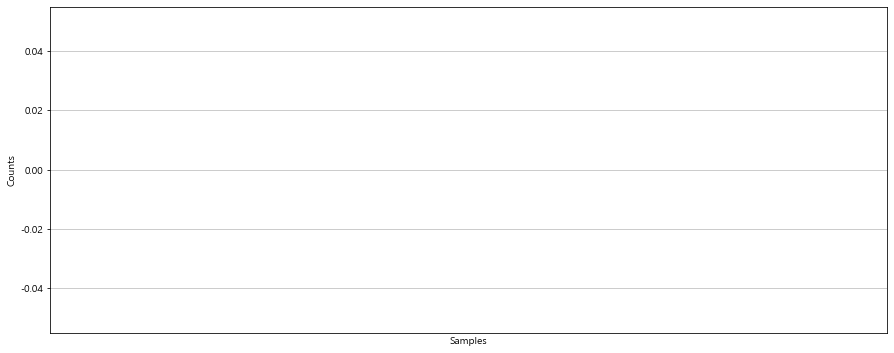

In [10]:
plt.figure(figsize=(15,6))
ko.plot(100) 
plt.show()

In [11]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.